### 2.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [2]:
from google.colab import drive

In [3]:
# get size of the variable in megabytes
def get_variable_size(var):
    display(sys.getsizeof(var)/ (1024**2))

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Прочитаем наш файл с исходными данными:

In [5]:
taxi_data = pd.read_csv("/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### 2.1

In [7]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
taxi_data['pickup_datetime'].dtype

dtype('<M8[ns]')

In [9]:
print(taxi_data['pickup_datetime'].min())
print(taxi_data['pickup_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [10]:
taxi_data.isnull().sum().sum()

0

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


#### 2.3 a

In [11]:
taxi_data['vendor_id'].nunique()

2

#### 2.3 b

In [12]:
taxi_data['passenger_count'].max()

9

#### 2.3 c

In [13]:
taxi_data['trip_duration'].mean()

959.4922729603659

In [14]:
taxi_data['trip_duration'].median()

662.0

#### 2.3 d

In [15]:
taxi_data['trip_duration'].min()

1

In [16]:
taxi_data['trip_duration'].max()

3526282

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [17]:
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    return  df

In [18]:
taxi_data = add_datetime_features(taxi_data)

In [19]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5


In [20]:
taxi_data['pickup_day_of_week'].value_counts()

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: pickup_day_of_week, dtype: int64

In [21]:
taxi_data.groupby('pickup_date').size().mean()

8014.527472527472

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [22]:
holiday_data = pd.read_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/holiday_data.csv', sep=';')

In [23]:
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [24]:
holiday_data['holiday'].unique()

array(['New Years Day', 'Martin Luther King Jr. Day',
       "Lincoln's Birthday", "Presidents' Day", "Mother's Day",
       'Memorial Day', "Father's Day", 'Independence Day', 'Labor Day',
       'Columbus Day', 'Veterans Day', 'Thanksgiving',
       'Christmas Day (in lieu)', 'Election Day'], dtype=object)

In [25]:
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
holiday_data['date'] = holiday_data['date'].dt.date

In [26]:
def add_holiday_features(df, holidays):
    merged = pd.merge(df, holidays, left_on='pickup_date', right_on='date', how='left')
    merged['pickup_holiday'] = merged['holiday'].notnull().astype(int)
    merged = merged.drop(['date', 'holiday', 'day'], axis=1)
    return merged

In [27]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [28]:
taxi_data['pickup_holiday'].value_counts()

0    1407522
1      51122
Name: pickup_holiday, dtype: int64

In [29]:
taxi_data.groupby('pickup_holiday')['trip_duration'].median()

pickup_holiday
0    665.0
1    585.0
Name: trip_duration, dtype: float64

In [30]:
del holiday_data

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [31]:
osrm_data = pd.read_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/osrm_data_train.csv')

In [32]:
osrm_data.head(5)

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [33]:
def add_osrm_features(l, r, list_col):
    r_table = r[list_col]
    merged = pd.merge(l, r_table, on='id', how='left')
    return merged

In [34]:
columns = ['id', 'total_distance', 'total_travel_time', 'number_of_steps']

In [35]:
taxi_data = add_osrm_features(taxi_data, osrm_data, columns)

In [36]:
print(taxi_data.loc[:, columns])

                id  total_distance  total_travel_time  number_of_steps
0        id2875421          2009.1              164.9              5.0
1        id2377394          2513.2              332.0              6.0
2        id3858529         11060.8              767.6             16.0
3        id3504673          1779.4              235.8              4.0
4        id2181028          1614.9              140.1              5.0
...            ...             ...                ...              ...
1458639  id2376096          2234.6              311.7              8.0
1458640  id1049543          7638.0              589.6             11.0
1458641  id2304944          9871.5              642.9             10.0
1458642  id2714485          1628.3              161.6              7.0
1458643  id1209952          1134.2               90.7              2.0

[1458644 rows x 4 columns]


In [37]:
trip_duration_median = taxi_data['trip_duration'].median()

In [38]:
total_travel_median = taxi_data['total_travel_time'].median()

In [39]:
round(abs(trip_duration_median-total_travel_median))

372

In [40]:
taxi_data.isnull().any(axis=1).sum()

1

In [41]:
del osrm_data

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [42]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [43]:
def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [44]:
def add_geographical_features(df):
    pickup_latitude = df['pickup_latitude']
    pickup_longitude = df['pickup_longitude']
    dropoff_latitude = df['dropoff_latitude']
    dropoff_longitude = df['dropoff_longitude']
    df['haversine_distance'] = get_haversine_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)
    df['direction'] = get_angle_direction(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)
    return df

In [45]:
taxi_data = add_geographical_features(taxi_data)

In [46]:
taxi_data.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196


In [47]:
round(taxi_data['haversine_distance'].median(), 2)

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [48]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [49]:
def add_cluster_features(df, hstack, name_col, model):
    df[name_col] = model.predict(hstack)
    return df

In [50]:
coords = np.hstack((
    taxi_data[['pickup_latitude', 'pickup_longitude']],
    taxi_data[['dropoff_latitude', 'dropoff_longitude']]
))

In [51]:
taxi_data = add_cluster_features(taxi_data, coords, 'geo_cluster', kmeans)

In [52]:
taxi_data['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

In [53]:
get_variable_size(coords)

44.514404296875

In [54]:
#del coords

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [55]:
weather_data = pd.read_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/weather_data.csv')

In [56]:
weather_data.head(5)

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6


In [57]:
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')

In [58]:
weather_data['date'] = weather_data['time'].dt.date

In [59]:
weather_data['hour'] = weather_data['time'].dt.hour

In [60]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         8787 non-null   datetime64[ns]
 1   temperature  8787 non-null   float64       
 2   windchill    2295 non-null   float64       
 3   heat index   815 non-null    float64       
 4   humidity     8787 non-null   float64       
 5   pressure     8556 non-null   float64       
 6   dew Point    8787 non-null   float64       
 7   visibility   8787 non-null   float64       
 8   wind dir     8787 non-null   object        
 9   wind speed   8787 non-null   float64       
 10  gust speed   8787 non-null   float64       
 11  precip       8787 non-null   float64       
 12  events       8787 non-null   object        
 13  conditions   8787 non-null   object        
 14  date         8787 non-null   object        
 15  hour         8787 non-null   int64         
dtypes: dat

In [61]:
def add_weather_features(l_df, r_df, column, l_column, r_column):
    return pd.merge(
        left=l_df,
        right=r_df[column],
        how='left',
        left_on=l_column,
        right_on=r_column,
    )

In [62]:
columns = [
    "temperature",
    "visibility",
    "wind speed",
    "precip",
    "events",
    "date",
    "hour"
]

left_col_merge = ['pickup_date', 'pickup_hour']
right_col_merge = ['date', 'hour']

taxi_data = add_weather_features(taxi_data, weather_data, columns, left_col_merge, right_col_merge)
taxi_data.drop(['date', 'hour'], axis=1, inplace=True)

In [63]:
taxi_data.iloc[:, 21:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   temperature  1446612 non-null  float64
 1   visibility   1446612 non-null  float64
 2   wind speed   1446612 non-null  float64
 3   precip       1446612 non-null  float64
 4   events       1446612 non-null  object 
dtypes: float64(4), object(1)
memory usage: 66.8+ MB


In [64]:
taxi_data[taxi_data['events'] == 'Snow'].shape[0]

13126

In [65]:
round(taxi_data.isna().sum()[-1] / taxi_data.shape[0] * 100, 2)

0.82

In [66]:
get_variable_size(taxi_data)

657.6439847946167

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [67]:
def fill_null_weather_data(df):
    columns = ['temperature', 'visibility', 'wind speed', 'precip']
    df[columns] = df[columns].fillna(df.groupby('pickup_date')[columns].transform('median'))
    df['events'] = df['events'].fillna('None')
    return df

In [68]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data['temperature'].median()

11.1

In [69]:
get_variable_size(taxi_data)

657.9767484664917

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


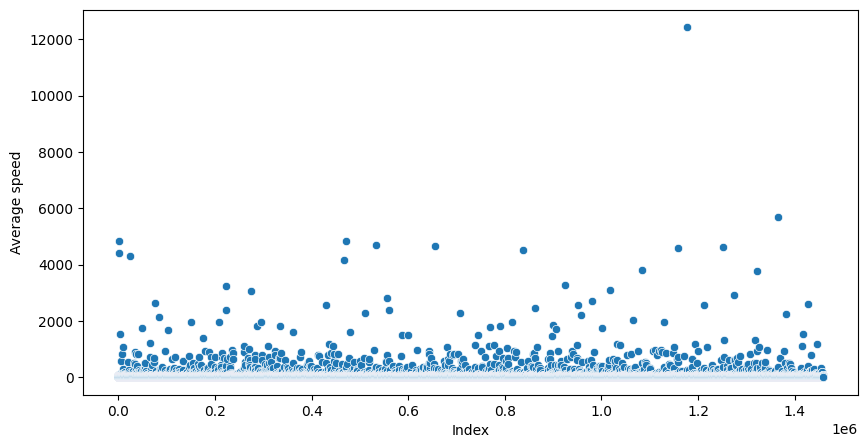

In [70]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [71]:
taxi_data_clean = taxi_data.copy()

In [72]:
del taxi_data

In [73]:
taxi_data_clean.shape

(1458644, 26)

In [74]:
(taxi_data_clean['trip_duration'] > 24 * 60 * 60).sum()

4

In [75]:
indices_to_drop = taxi_data_clean[taxi_data_clean['trip_duration'] > 24 * 60 * 60].index
taxi_data_clean = taxi_data_clean.drop(indices_to_drop)

In [76]:
taxi_data_clean.shape

(1458640, 26)

In [77]:
average_speed = taxi_data_clean['total_distance'] / taxi_data_clean['trip_duration'] * 3.6
taxi_data_clean['average_speed'] = average_speed

indices_to_drop = taxi_data_clean[taxi_data_clean['average_speed'] >= 300].index
taxi_data_clean.dropna(inplace=True)

display(len(indices_to_drop))

406

In [78]:
taxi_data_clean = taxi_data_clean.drop(indices_to_drop)

In [79]:
taxi_data_clean.shape

(1458233, 27)

In [80]:
get_variable_size(taxi_data_clean)

668.9167861938477

In [81]:
taxi_data_clean.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,average_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,15.896176
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,13.646335
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,18.747119
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,14.932028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,13.364690


In [84]:
taxi_data_clean.to_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/taxi_data_clean.csv', index=False)